In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from keras.models import Sequential
from keras.layers import Dense

**membuat fungsi untuk load dan combined dataset**

In [3]:
# fungsi untuk load dataset

def get_data():
    
    # get train data
    train_data_path = "train.csv"
    train = pd.read_csv(train_data_path)
    
    # get test data
    test_data_path = "test.csv"
    test = pd.read_csv(test_data_path)
    
    return train, test

In [4]:
# dataset
train_data, test_data = get_data()

In [5]:
train_data.shape

(1460, 81)

In [6]:
# fungsi untuk kombinasi data
def combined_data():
        
    train, test = get_data()
        
    target = train.SalePrice
    train.drop(["SalePrice"], axis=1, inplace=True)
        
    combined = pd.concat([train, test])
    combined.reset_index(inplace=True)
    combined.drop(["index", "Id"], inplace=True, axis=1)
        
    return combined, target

* `pd.concat` digunakan untuk menambahkan data test ke data train
* ketika menambahkan data, index tidak diperbaharui, itu sebabnya index direset `pd.reset_index()`
* kolom index dimasukkan menjadi kolom ketika melakukan `reset_index()`, itu kenapa ikutan dihapus.

In [7]:
combined, target = combined_data()

In [8]:
combined.shape

(2919, 79)

**membuat fungsi untuk membuang kolom yang memiliki missing value**

In [9]:
def col_with_no_nan(df, col_type):
    """
    Arguments :
    df : the dataframe to process
    col_type :
        num : to only get numerical columns with no nans
        no_num : to only get non numerical columns with no nans
        all : to get any columns with no nans
    """
    if (col_type == "num"):
        predictors = df.select_dtypes(exclude=["object"])
    elif (col_type == "no_num"):
        predictors = df.select_dtypes(include=["object"])
    elif (col_type == "all"):
        predictors = df
    else:
        print("Error : choose a type (num, no_num, all)")
        return 0
    cols_with_no_nans = []
    for col in predictors.columns:
        if not df[col].isna().any():
            cols_with_no_nans.append(col)
    return cols_with_no_nans

In [10]:
# kolom tanpa missing value
num_cols = col_with_no_nan(combined, "num")
cat_cols = col_with_no_nan(combined, "no_num")

In [11]:
print ('Number of numerical columns with no nan values :',len(num_cols))
print ('Number of nun-numerical columns with no nan values :',len(cat_cols))

Number of numerical columns with no nan values : 25
Number of nun-numerical columns with no nan values : 20


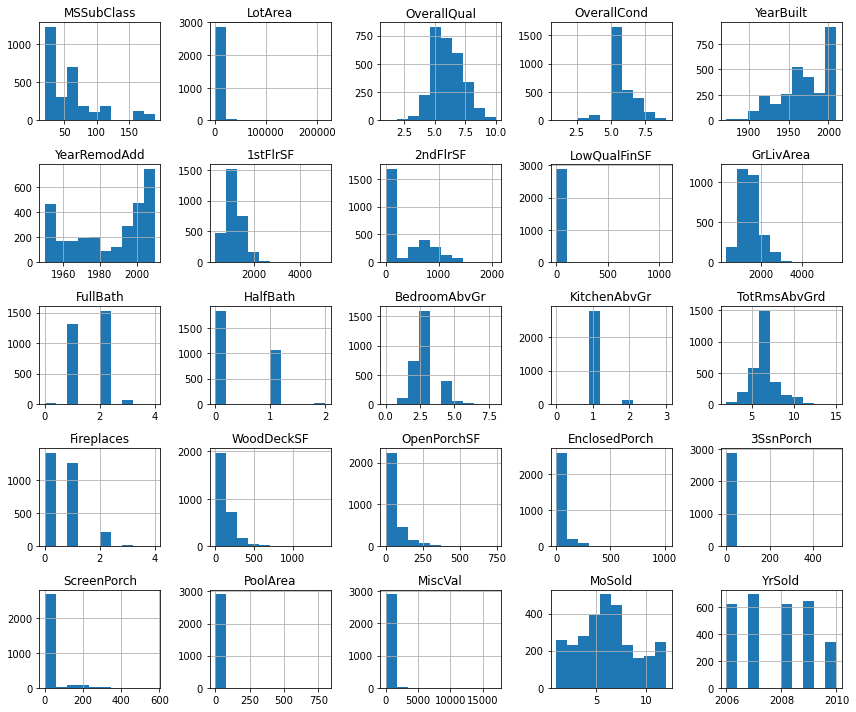

In [12]:
combined = combined[num_cols + cat_cols]
combined.hist(figsize = (12, 10))
plt.tight_layout()
plt.show()

**korelasi antara feature**

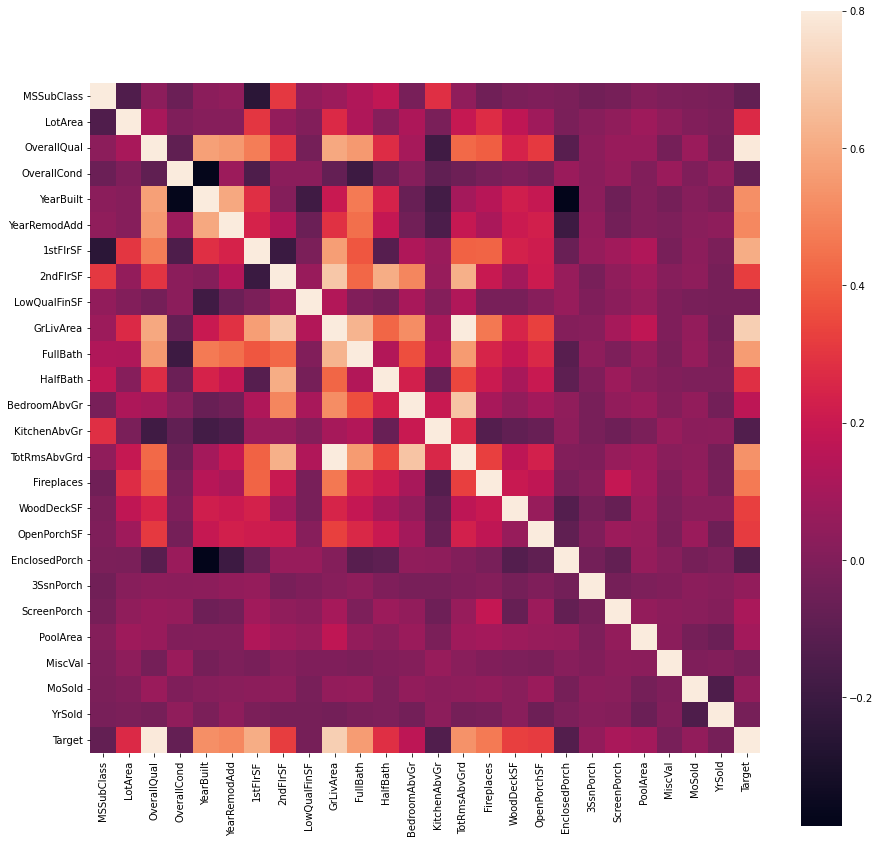

In [13]:
train_data = train_data[num_cols + cat_cols]
train_data["Target"] = target

C_mat = train_data.corr()
fig = plt.figure(figsize= (15, 15))

sns.heatmap(C_mat, vmax = .8, square = True)
plt.show()

**encode categorical feature**

In [14]:
def encodeOneHot(df, colNames):
    for col in colNames:
        if (df[col].dtype == np.dtype("object")):
            dummies = pd.get_dummies(df[col], prefix = col)
            df = pd.concat([df, dummies], axis = 1)
            
            # drop encoded 
            df.drop([col], axis = 1, inplace=True)
    return df

In [15]:
print('There were {} columns before encoding categorical features'.format(combined.shape[1]))

combined = encodeOneHot(combined, cat_cols)
print('There are {} columns after encoding categorical features'.format(combined.shape[1]))

There were 45 columns before encoding categorical features
There are 149 columns after encoding categorical features


**split**

In [16]:
def split_combined():
    global combined
    train = combined[:1460]
    test = combined[1460:]

    return train , test 

In [17]:
train, test = split_combined()

# Model 

In [18]:
NN_model = Sequential()

NN_model.add(Dense(128, kernel_initializer='normal',input_dim = train.shape[1], activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))

NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

In [19]:
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               19200     
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dense_2 (Dense)             (None, 256)               65792     
                                                                 
 dense_3 (Dense)             (None, 256)               65792     
                                                                 
 dense_4 (Dense)             (None, 1)                 257       
                                                                 
Total params: 184,065
Trainable params: 184,065
Non-trainable params: 0
_________________________________________________________________


In [21]:
NN_model.fit(train, target, epochs=500, batch_size=32, validation_split = 0.2)

Epoch 1/500
37/37 [==============================] - 2s 10ms/step - loss: 128254.9297 - mean_absolute_error: 128254.9297 - val_loss: 59019.8438 - val_mean_absolute_error: 59019.8438
Epoch 2/500
37/37 [==============================] - 0s 5ms/step - loss: 53809.8320 - mean_absolute_error: 53809.8320 - val_loss: 48647.6875 - val_mean_absolute_error: 48647.6875
Epoch 3/500
37/37 [==============================] - 0s 4ms/step - loss: 45990.8398 - mean_absolute_error: 45990.8398 - val_loss: 44252.0156 - val_mean_absolute_error: 44252.0156
Epoch 4/500
37/37 [==============================] - 0s 3ms/step - loss: 41965.0938 - mean_absolute_error: 41965.0938 - val_loss: 42029.8438 - val_mean_absolute_error: 42029.8438
Epoch 5/500
37/37 [==============================] - 0s 4ms/step - loss: 39191.1562 - mean_absolute_error: 39191.1562 - val_loss: 42840.5352 - val_mean_absolute_error: 42840.5352
Epoch 6/500
37/37 [==============================] - 0s 4ms/step - loss: 37491.6719 - mean_absolute_er

37/37 [==============================] - 0s 7ms/step - loss: 30729.4961 - mean_absolute_error: 30729.4961 - val_loss: 35349.9688 - val_mean_absolute_error: 35349.9688
Epoch 47/500
37/37 [==============================] - 0s 4ms/step - loss: 31634.1309 - mean_absolute_error: 31634.1309 - val_loss: 34259.4336 - val_mean_absolute_error: 34259.4336
Epoch 48/500
37/37 [==============================] - 0s 4ms/step - loss: 30245.8398 - mean_absolute_error: 30245.8398 - val_loss: 33782.0508 - val_mean_absolute_error: 33782.0508
Epoch 49/500
37/37 [==============================] - 0s 3ms/step - loss: 29952.4492 - mean_absolute_error: 29952.4492 - val_loss: 33103.6016 - val_mean_absolute_error: 33103.6016
Epoch 50/500
37/37 [==============================] - 0s 4ms/step - loss: 30270.6094 - mean_absolute_error: 30270.6094 - val_loss: 33500.6250 - val_mean_absolute_error: 33500.6250
Epoch 51/500
37/37 [==============================] - 0s 3ms/step - loss: 30154.4512 - mean_absolute_error: 30154

37/37 [==============================] - 0s 4ms/step - loss: 24426.0801 - mean_absolute_error: 24426.0801 - val_loss: 28030.2695 - val_mean_absolute_error: 28030.2695
Epoch 92/500
37/37 [==============================] - 0s 4ms/step - loss: 23501.3398 - mean_absolute_error: 23501.3398 - val_loss: 28395.2422 - val_mean_absolute_error: 28395.2422
Epoch 93/500
37/37 [==============================] - 0s 4ms/step - loss: 23401.8477 - mean_absolute_error: 23401.8477 - val_loss: 28437.2285 - val_mean_absolute_error: 28437.2285
Epoch 94/500
37/37 [==============================] - 0s 4ms/step - loss: 25509.8848 - mean_absolute_error: 25509.8848 - val_loss: 27828.8809 - val_mean_absolute_error: 27828.8809
Epoch 95/500
37/37 [==============================] - 0s 4ms/step - loss: 25008.0352 - mean_absolute_error: 25008.0352 - val_loss: 26018.2520 - val_mean_absolute_error: 26018.2520
Epoch 96/500
37/37 [==============================] - 0s 4ms/step - loss: 24665.0430 - mean_absolute_error: 24665

37/37 [==============================] - 0s 4ms/step - loss: 19519.1875 - mean_absolute_error: 19519.1875 - val_loss: 21971.4727 - val_mean_absolute_error: 21971.4727
Epoch 137/500
37/37 [==============================] - 0s 4ms/step - loss: 19973.6406 - mean_absolute_error: 19973.6406 - val_loss: 22863.2891 - val_mean_absolute_error: 22863.2891
Epoch 138/500
37/37 [==============================] - 0s 4ms/step - loss: 19936.0801 - mean_absolute_error: 19936.0801 - val_loss: 22232.6035 - val_mean_absolute_error: 22232.6035
Epoch 139/500
37/37 [==============================] - 0s 4ms/step - loss: 19961.1504 - mean_absolute_error: 19961.1504 - val_loss: 25401.4395 - val_mean_absolute_error: 25401.4395
Epoch 140/500
37/37 [==============================] - 0s 4ms/step - loss: 20042.0645 - mean_absolute_error: 20042.0645 - val_loss: 21549.7871 - val_mean_absolute_error: 21549.7871
Epoch 141/500
37/37 [==============================] - 0s 4ms/step - loss: 20433.0703 - mean_absolute_error: 

37/37 [==============================] - 0s 4ms/step - loss: 19806.1406 - mean_absolute_error: 19806.1406 - val_loss: 21646.8594 - val_mean_absolute_error: 21646.8594
Epoch 182/500
37/37 [==============================] - 0s 4ms/step - loss: 18289.4375 - mean_absolute_error: 18289.4375 - val_loss: 22680.3633 - val_mean_absolute_error: 22680.3633
Epoch 183/500
37/37 [==============================] - 0s 3ms/step - loss: 18148.9824 - mean_absolute_error: 18148.9824 - val_loss: 22005.0605 - val_mean_absolute_error: 22005.0605
Epoch 184/500
37/37 [==============================] - 0s 4ms/step - loss: 17761.5488 - mean_absolute_error: 17761.5488 - val_loss: 22437.8203 - val_mean_absolute_error: 22437.8203
Epoch 185/500
37/37 [==============================] - 0s 3ms/step - loss: 17387.1465 - mean_absolute_error: 17387.1465 - val_loss: 23659.0820 - val_mean_absolute_error: 23659.0820
Epoch 186/500
37/37 [==============================] - 0s 3ms/step - loss: 17707.2500 - mean_absolute_error: 

37/37 [==============================] - 0s 4ms/step - loss: 17662.6973 - mean_absolute_error: 17662.6973 - val_loss: 22635.7852 - val_mean_absolute_error: 22635.7852
Epoch 227/500
37/37 [==============================] - 0s 4ms/step - loss: 17462.4648 - mean_absolute_error: 17462.4648 - val_loss: 21595.4609 - val_mean_absolute_error: 21595.4609
Epoch 228/500
37/37 [==============================] - 0s 4ms/step - loss: 17713.4316 - mean_absolute_error: 17713.4316 - val_loss: 20203.3184 - val_mean_absolute_error: 20203.3184
Epoch 229/500
37/37 [==============================] - 0s 4ms/step - loss: 19689.6191 - mean_absolute_error: 19689.6191 - val_loss: 21332.1934 - val_mean_absolute_error: 21332.1934
Epoch 230/500
37/37 [==============================] - 0s 4ms/step - loss: 17433.5449 - mean_absolute_error: 17433.5449 - val_loss: 20971.7012 - val_mean_absolute_error: 20971.7012
Epoch 231/500
37/37 [==============================] - 0s 4ms/step - loss: 17941.3887 - mean_absolute_error: 

37/37 [==============================] - 0s 4ms/step - loss: 18490.6094 - mean_absolute_error: 18490.6094 - val_loss: 23300.0449 - val_mean_absolute_error: 23300.0449
Epoch 272/500
37/37 [==============================] - 0s 4ms/step - loss: 18293.3047 - mean_absolute_error: 18293.3047 - val_loss: 21431.8828 - val_mean_absolute_error: 21431.8828
Epoch 273/500
37/37 [==============================] - 0s 4ms/step - loss: 19009.7012 - mean_absolute_error: 19009.7012 - val_loss: 21320.1094 - val_mean_absolute_error: 21320.1094
Epoch 274/500
37/37 [==============================] - 0s 4ms/step - loss: 16918.0820 - mean_absolute_error: 16918.0820 - val_loss: 23834.8477 - val_mean_absolute_error: 23834.8477
Epoch 275/500
37/37 [==============================] - 0s 4ms/step - loss: 20028.1270 - mean_absolute_error: 20028.1270 - val_loss: 20461.2852 - val_mean_absolute_error: 20461.2852
Epoch 276/500
37/37 [==============================] - 0s 4ms/step - loss: 16685.6113 - mean_absolute_error: 

37/37 [==============================] - 0s 4ms/step - loss: 16571.9414 - mean_absolute_error: 16571.9414 - val_loss: 20046.5977 - val_mean_absolute_error: 20046.5977
Epoch 317/500
37/37 [==============================] - 0s 4ms/step - loss: 15612.6953 - mean_absolute_error: 15612.6953 - val_loss: 20680.4238 - val_mean_absolute_error: 20680.4238
Epoch 318/500
37/37 [==============================] - 0s 4ms/step - loss: 16731.8496 - mean_absolute_error: 16731.8496 - val_loss: 19762.6953 - val_mean_absolute_error: 19762.6953
Epoch 319/500
37/37 [==============================] - 0s 4ms/step - loss: 20584.7285 - mean_absolute_error: 20584.7285 - val_loss: 28697.1406 - val_mean_absolute_error: 28697.1406
Epoch 320/500
37/37 [==============================] - 0s 4ms/step - loss: 17383.8145 - mean_absolute_error: 17383.8145 - val_loss: 20785.7305 - val_mean_absolute_error: 20785.7305
Epoch 321/500
37/37 [==============================] - 0s 4ms/step - loss: 15559.8047 - mean_absolute_error: 

37/37 [==============================] - 0s 4ms/step - loss: 17424.2051 - mean_absolute_error: 17424.2051 - val_loss: 19118.7402 - val_mean_absolute_error: 19118.7402
Epoch 362/500
37/37 [==============================] - 0s 4ms/step - loss: 16101.8135 - mean_absolute_error: 16101.8135 - val_loss: 21406.2969 - val_mean_absolute_error: 21406.2969
Epoch 363/500
37/37 [==============================] - 0s 4ms/step - loss: 15349.1543 - mean_absolute_error: 15349.1543 - val_loss: 20420.8555 - val_mean_absolute_error: 20420.8555
Epoch 364/500
37/37 [==============================] - 0s 3ms/step - loss: 15124.1338 - mean_absolute_error: 15124.1338 - val_loss: 20470.7324 - val_mean_absolute_error: 20470.7324
Epoch 365/500
37/37 [==============================] - 0s 4ms/step - loss: 15161.2520 - mean_absolute_error: 15161.2520 - val_loss: 19789.0547 - val_mean_absolute_error: 19789.0547
Epoch 366/500
37/37 [==============================] - 0s 5ms/step - loss: 14873.6777 - mean_absolute_error: 

37/37 [==============================] - 0s 4ms/step - loss: 15644.8633 - mean_absolute_error: 15644.8633 - val_loss: 18554.8672 - val_mean_absolute_error: 18554.8672
Epoch 407/500
37/37 [==============================] - 0s 4ms/step - loss: 15027.8496 - mean_absolute_error: 15027.8496 - val_loss: 20421.4355 - val_mean_absolute_error: 20421.4355
Epoch 408/500
37/37 [==============================] - 0s 3ms/step - loss: 15206.7520 - mean_absolute_error: 15206.7520 - val_loss: 18704.2949 - val_mean_absolute_error: 18704.2949
Epoch 409/500
37/37 [==============================] - 0s 6ms/step - loss: 15274.7158 - mean_absolute_error: 15274.7158 - val_loss: 20100.3398 - val_mean_absolute_error: 20100.3398
Epoch 410/500
37/37 [==============================] - 0s 4ms/step - loss: 15659.6338 - mean_absolute_error: 15659.6338 - val_loss: 19406.1367 - val_mean_absolute_error: 19406.1367
Epoch 411/500
37/37 [==============================] - 0s 5ms/step - loss: 14378.1201 - mean_absolute_error: 

37/37 [==============================] - 0s 4ms/step - loss: 14356.4180 - mean_absolute_error: 14356.4180 - val_loss: 20921.2422 - val_mean_absolute_error: 20921.2422
Epoch 452/500
37/37 [==============================] - 0s 4ms/step - loss: 14899.6914 - mean_absolute_error: 14899.6914 - val_loss: 19868.2012 - val_mean_absolute_error: 19868.2012
Epoch 453/500
37/37 [==============================] - 0s 5ms/step - loss: 13740.0059 - mean_absolute_error: 13740.0059 - val_loss: 20505.0488 - val_mean_absolute_error: 20505.0488
Epoch 454/500
37/37 [==============================] - 0s 4ms/step - loss: 16260.8066 - mean_absolute_error: 16260.8066 - val_loss: 18573.5762 - val_mean_absolute_error: 18573.5762
Epoch 455/500
37/37 [==============================] - 0s 4ms/step - loss: 14534.2637 - mean_absolute_error: 14534.2637 - val_loss: 18266.6465 - val_mean_absolute_error: 18266.6465
Epoch 456/500
37/37 [==============================] - 0s 4ms/step - loss: 15732.6094 - mean_absolute_error: 

37/37 [==============================] - 0s 5ms/step - loss: 15520.5117 - mean_absolute_error: 15520.5117 - val_loss: 21265.0215 - val_mean_absolute_error: 21265.0215
Epoch 497/500
37/37 [==============================] - 0s 4ms/step - loss: 14039.5176 - mean_absolute_error: 14039.5176 - val_loss: 18376.5918 - val_mean_absolute_error: 18376.5918
Epoch 498/500
37/37 [==============================] - 0s 4ms/step - loss: 14933.6904 - mean_absolute_error: 14933.6904 - val_loss: 19795.5156 - val_mean_absolute_error: 19795.5156
Epoch 499/500
37/37 [==============================] - 0s 4ms/step - loss: 14705.9385 - mean_absolute_error: 14705.9385 - val_loss: 18881.0957 - val_mean_absolute_error: 18881.0957
Epoch 500/500
37/37 [==============================] - 0s 4ms/step - loss: 13878.6357 - mean_absolute_error: 13878.6357 - val_loss: 19426.5996 - val_mean_absolute_error: 19426.5996
